In [ ]:
"This notebook is for calculating single cell RNA velocity with Dynamo."

In [1]:
import dynamo as dyn
import numpy as np
from scipy import stats,signal
from matplotlib import pyplot as plt
from scipy import sparse
from sklearn.neighbors import KernelDensity
import networkx as nx
import os
from numpy.random import randint

In [ ]:
result_path='result/'
gene_arr=np.load(result_path+'EG_bin_genes.npy',allow_pickle=True)
dim_n=10
adata=dyn.read(result_path+'EG_ori_bin.h5ad')
t_list=['Ngn3 low EP','Ngn3 high EP','Fev+','Alpha']

In [ ]:
dyn.pp.recipe_monocle(adata,keep_filtered_genes=False,keep_filtered_cells=True)

dyn.tl.dynamics(adata,assumption_mRNA='auto')
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color='clusters',pointsize=0.1)

In [10]:
dyn.tl.cell_velocities(adata, method='fp',basis='pca',  correct_density=False)#ekey='M_s',vkey='velocity_S',

|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.8008s]


AnnData object with n_obs × n_vars = 1731 × 470
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'palantir_pseudotime', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'highly_variable_genes', 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'clusters_fine_colors', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'dynamics', 'grid_velocity_pca'
    obsm: 'X_pca', 'X_umap'

<Figure size 600x400 with 0 Axes>

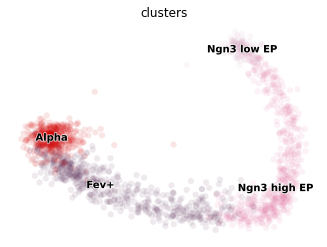

In [12]:
dyn.pl.pca(adata, color='clusters',pointsize=0.1)

In [16]:
adata.write(result_path+'EG_dyn.h5ad')